# Easy ways to visualise data when using Polars

In [1]:
import altair as alt
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_lineitem = pl.scan_parquet('data10/lineitem.parquet')

In [4]:
df_lineitem.fetch(5)

l_orderkey,l_partkey,l_suppkey,l_linenumber,l_quantity,l_extendedprice,l_discount,l_tax,l_returnflag,l_linestatus,l_shipdate,l_commitdate,l_receiptdate,l_shipinstruct,l_shipmode,comments,column_17
i64,i64,i64,i64,i64,f64,f64,f64,str,str,datetime[μs],datetime[μs],datetime[μs],str,str,str,str
1,1551894,76910,1,17,33078.94,0.04,0.02,"""N""","""O""",1996-03-13 00:00:00,1996-02-12 00:00:00,1996-03-22 00:00:00,"""DELIVER IN PER…","""TRUCK""","""egular courts …",null
1,673091,73092,2,36,38306.16,0.09,0.06,"""N""","""O""",1996-04-12 00:00:00,1996-02-28 00:00:00,1996-04-20 00:00:00,"""TAKE BACK RETU…","""MAIL""","""ly final depen…",null
1,636998,36999,3,8,15479.68,0.1,0.02,"""N""","""O""",1996-01-29 00:00:00,1996-03-05 00:00:00,1996-01-31 00:00:00,"""TAKE BACK RETU…","""REG AIR""","""riously. regul…",null
1,21315,46316,4,28,34616.68,0.09,0.06,"""N""","""O""",1996-04-21 00:00:00,1996-03-30 00:00:00,1996-05-16 00:00:00,"""NONE""","""AIR""","""lites. fluffil…",null
1,240267,15274,5,24,28974.0,0.1,0.04,"""N""","""O""",1996-03-30 00:00:00,1996-03-14 00:00:00,1996-04-01 00:00:00,"""NONE""","""FOB""",""" pending foxes…",null


In [5]:
# this query takes a bit of time and we don't require it for the rest of the notebook.
# uncomment it when you want to see the execution time and the result

df_lineitem.collect().describe()

describe,l_orderkey,l_partkey,l_suppkey,l_linenumber,l_quantity,l_extendedprice,l_discount,l_tax,l_returnflag,l_linestatus,l_shipdate,l_commitdate,l_receiptdate,l_shipinstruct,l_shipmode,comments,column_17
str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str
"""count""",5.9986052e7,5.9986052e7,5.9986052e7,5.9986052e7,5.9986052e7,5.9986052e7,5.9986052e7,5.9986052e7,"""59986052""","""59986052""","""59986052""","""59986052""","""59986052""","""59986052""","""59986052""","""59986052""","""59986052"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""59986052"""
"""mean""",2.9998e7,1.0002e6,50005.629038,2.999604,25.501562,38239.108598,0.050001,0.040007,null,null,null,null,null,null,null,null,null
"""std""",1.7321e7,577345.571627,28868.206923,1.731883,14.430847,23296.239545,0.031621,0.025818,null,null,null,null,null,null,null,null,null
"""min""",1.0,1.0,1.0,1.0,1.0,900.91,0.0,0.0,"""A""","""F""","""1992-01-02 00:…","""1992-01-31 00:…","""1992-01-03 00:…","""COLLECT COD""","""AIR""",""" Tiresias """,null
"""25%""",1.499991e7,500197.0,25005.0,1.0,13.0,18716.15,0.02,0.02,null,null,null,null,null,null,null,null,null
"""50%""",2.9993286e7,1.000264e6,50006.0,3.0,26.0,36715.0,0.05,0.04,null,null,null,null,null,null,null,null,null
"""75%""",4.4997735e7,1.500178e6,75005.0,4.0,38.0,55133.04,0.08,0.06,null,null,null,null,null,null,null,null,null
"""max""",6e7,2e6,100000.0,7.0,50.0,104949.5,0.1,0.08,"""R""","""O""","""1998-12-01 00:…","""1998-10-31 00:…","""1998-12-31 00:…","""TAKE BACK RETU…","""TRUCK""","""zzle? slyly re…",null


In [6]:
df_monthly = df_lineitem.sort(by="l_shipdate").group_by_dynamic("l_shipdate", every="1m").agg(pl.col("l_quantity").mean().alias("avg_qty"))

In [7]:
df_monthly.sort(by="l_shipdate").fetch(10)

l_shipdate,avg_qty
datetime[μs],f64
1993-11-09 00:00:00,49.0
1994-01-16 00:00:00,27.0
1994-02-02 00:00:00,45.0
1996-01-29 00:00:00,8.0
1996-01-30 00:00:00,32.0
1996-03-13 00:00:00,17.0
1996-03-30 00:00:00,24.0
1996-04-12 00:00:00,36.0
1996-04-21 00:00:00,28.0


In [8]:
df_yearly = df_lineitem.sort(by="l_shipdate").group_by_dynamic("l_shipdate", every="1y").agg(pl.col("l_quantity").mean().alias("avg_qty"))

## Seaborn

CPU times: user 8.49 s, sys: 591 ms, total: 9.08 s
Wall time: 2.59 s


[Text(0.5, 1.0, 'Average Quantity Sold by Year')]

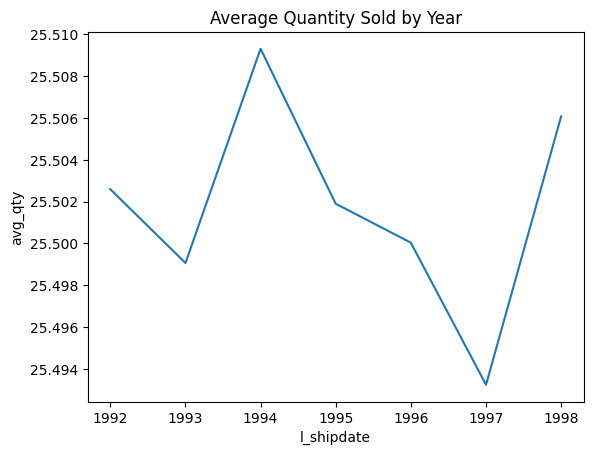

In [9]:
%%time

sns.lineplot(data=df_yearly.collect(),
            x='l_shipdate',
            y='avg_qty').set(title='Average Quantity Sold by Year')

CPU times: user 8.77 s, sys: 620 ms, total: 9.39 s
Wall time: 2.57 s


[Text(0.5, 1.0, 'Average Quantity Sold by Month')]

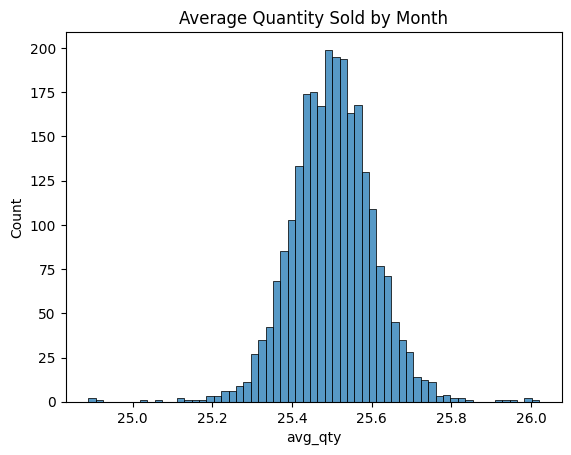

In [10]:
%%time

sns.histplot(
    data=(df_monthly.collect()),
    x='avg_qty').set(title='Average Quantity Sold by Month')

## Matplotlib

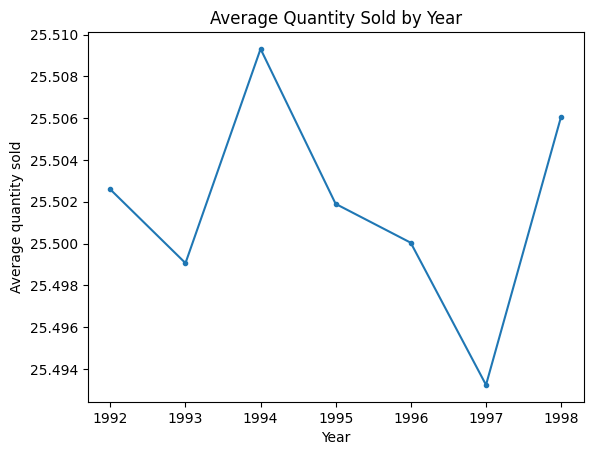

CPU times: user 11.3 s, sys: 546 ms, total: 11.8 s
Wall time: 3.68 s


In [11]:
%%time

plt.plot(df_yearly.select(pl.col('l_shipdate')).collect(), df_yearly.select(pl.col('avg_qty')).collect(), marker='.')

plt.xlabel('Year')
plt.ylabel('Average quantity sold')
plt.title('Average Quantity Sold by Year')
plt.show()

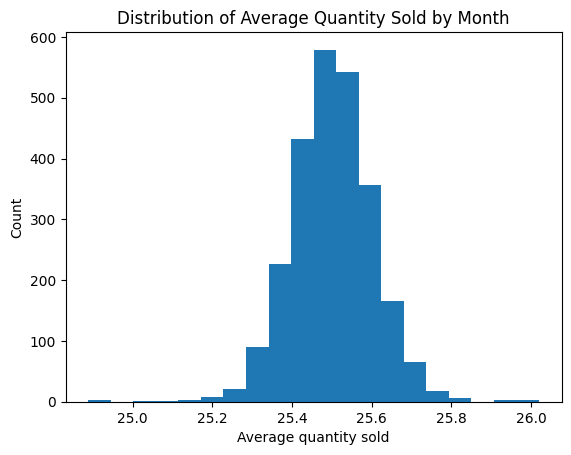

CPU times: user 9.05 s, sys: 447 ms, total: 9.5 s
Wall time: 2.45 s


In [12]:
%%time

plt.hist(df_monthly.select(pl.col('avg_qty')).collect(), bins=20)

plt.xlabel('Average quantity sold')
plt.ylabel('Count')
plt.title('Distribution of Average Quantity Sold by Month')
plt.show()


## Altair

In [13]:
%%time

df_orders = pl.scan_parquet('./data10/orders.parquet')

CPU times: user 8.93 ms, sys: 701 µs, total: 9.63 ms
Wall time: 2.7 ms


In [14]:
df_orders.fetch(5)

o_orderkey,o_custkey,o_orderstatus,o_totalprice,o_orderdate,o_orderpriority,o_clerk,o_shippriority,o_comment,column_10
i64,i64,str,f64,datetime[μs],str,str,i64,str,str
1,369001,"""O""",186600.18,1996-01-02 00:00:00,"""5-LOW""","""Clerk#00000950…",0,"""nstructions sl…",null
2,780017,"""O""",66219.63,1996-12-01 00:00:00,"""1-URGENT""","""Clerk#00000879…",0,""" foxes. pendin…",null
3,1233140,"""F""",270741.97,1993-10-14 00:00:00,"""5-LOW""","""Clerk#00000954…",0,"""sly final acco…",null
4,1367761,"""O""",41714.38,1995-10-11 00:00:00,"""5-LOW""","""Clerk#00000123…",0,"""sits. slyly re…",null
5,444848,"""F""",122444.33,1994-07-30 00:00:00,"""5-LOW""","""Clerk#00000924…",0,"""quickly. bold …",null


In [15]:
%%time

altair_df = df_orders.sort(by="o_orderdate").group_by_dynamic("o_orderdate", every="1y").agg(
    pl.col("o_totalprice").median().alias("median_price"),
    pl.col("o_totalprice").max().alias("highest_price"))

altair_df.fetch(10)

CPU times: user 282 ms, sys: 29.3 ms, total: 312 ms
Wall time: 158 ms


o_orderdate,median_price,highest_price
datetime[μs],f64,f64
1992-01-01 00:00:00,50883.96,50883.96
1993-01-01 00:00:00,198870.425,270741.97
1994-01-01 00:00:00,122444.33,122444.33
1995-01-01 00:00:00,85674.615,129634.85
1996-01-01 00:00:00,186600.18,287534.8
1998-01-01 00:00:00,55314.82,55314.82


In [16]:
%%time

altair_df.fetch(10)

CPU times: user 286 ms, sys: 10.2 ms, total: 296 ms
Wall time: 149 ms


o_orderdate,median_price,highest_price
datetime[μs],f64,f64
1992-01-01 00:00:00,50883.96,50883.96
1993-01-01 00:00:00,198870.425,270741.97
1994-01-01 00:00:00,122444.33,122444.33
1995-01-01 00:00:00,85674.615,129634.85
1996-01-01 00:00:00,186600.18,287534.8
1998-01-01 00:00:00,55314.82,55314.82


### Altair

In [17]:
%%time

altair_df = df_orders.sort(by="o_orderdate").group_by_dynamic("o_orderdate", every="1y").agg(
    pl.col("o_totalprice").median().alias("median_price"),
    pl.col("o_totalprice").max().alias("highest_price"))


line_high = alt.Chart(
    altair_df.collect()
    ).mark_line(color='red').encode(
    x='o_orderdate:T',
    y='highest_price:Q',
    tooltip=['o_orderdate:T', 'highest_price:Q']
)

line_median = alt.Chart(
    altair_df.collect()
    ).mark_line(color='blue').encode(
    x='o_orderdate:T',
    y='median_price:Q',
    tooltip=['o_orderdate:T', 'median_price:Q']
)

(line_high + line_median).properties(
    title='Highest and Median Prices Per Year',
    width=500
)

CPU times: user 4.23 s, sys: 163 ms, total: 4.39 s
Wall time: 1.16 s


alt.LayerChart(...)

In [18]:
%%time

alt.Chart(df_yearly.collect()).mark_line().encode(
    alt.X('l_shipdate'),
    alt.Y('avg_qty', 
    scale=alt.Scale(domain=[25, 26])))

CPU times: user 8.55 s, sys: 408 ms, total: 8.96 s
Wall time: 2.35 s


alt.Chart(...)

## Plot more complex queries

In [19]:
%%time

(
    df_lineitem.join(df_orders, left_on="l_orderkey", right_on="o_orderkey")
    .filter(pl.col("l_commitdate") < pl.col("l_receiptdate"))
    .unique(subset=["o_orderpriority", "l_orderkey"])
    .groupby("o_orderpriority")
    .agg(pl.count().alias("order_count"))
    .sort(by="o_orderpriority")
    .with_columns(pl.col("order_count").cast(pl.datatypes.Int64))
).collect()

CPU times: user 12 s, sys: 1.39 s, total: 13.4 s
Wall time: 3.59 s


o_orderpriority,order_count
str,i64
"""1-URGENT""",2753958
"""2-HIGH""",2750977
"""3-MEDIUM""",2749788
"""4-NOT SPECIFIE…",2751007
"""5-LOW""",2747744


### Utilising Pandas

CPU times: user 12.3 s, sys: 1.19 s, total: 13.5 s
Wall time: 3.28 s


<Axes: xlabel='o_orderpriority'>

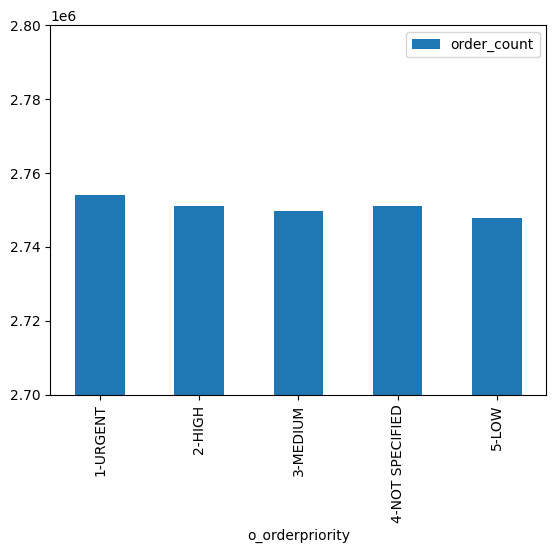

In [20]:
%%time

(
    df_lineitem.join(df_orders, left_on="l_orderkey", right_on="o_orderkey")
    .filter(pl.col("l_commitdate") < pl.col("l_receiptdate"))
    .unique(subset=["o_orderpriority", "l_orderkey"])
    .groupby("o_orderpriority")
    .agg(pl.count().alias("order_count"))
    .sort(by="o_orderpriority")
    .with_columns(pl.col("order_count").cast(pl.datatypes.Int64))
).collect().to_pandas().plot(x='o_orderpriority', kind='bar', ylim=[2.7*1e6, 2.8*1e6])

### Matplotlib

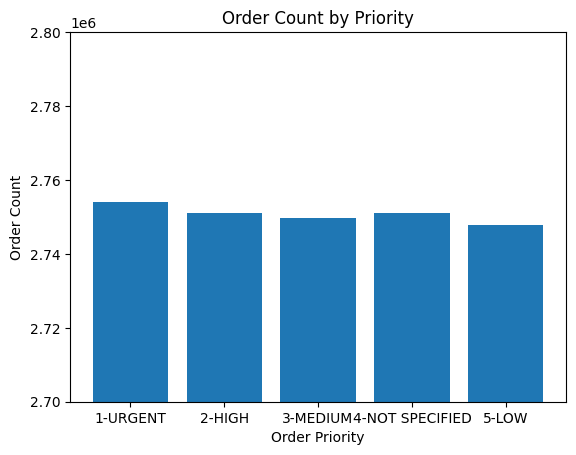

CPU times: user 12.8 s, sys: 1.25 s, total: 14 s
Wall time: 3.39 s


In [21]:
%%time

query = (
    df_lineitem.join(df_orders, left_on="l_orderkey", right_on="o_orderkey")
    .filter(pl.col("l_commitdate") < pl.col("l_receiptdate"))
    .unique(subset=["o_orderpriority", "l_orderkey"])
    .groupby("o_orderpriority")
    .agg(pl.count().alias("order_count"))
    .sort(by="o_orderpriority")
    .with_columns(pl.col("order_count").cast(pl.datatypes.Int64))
).collect()

plt.bar(x='o_orderpriority', data=query, height='order_count')

plt.ylim([2.7*1e6, 2.8*1e6])
plt.xlabel('Order Priority')
plt.ylabel('Order Count')
plt.title('Order Count by Priority')
plt.show()


### Altair

In [23]:
%%time

alt.Chart(
    query
    ).mark_bar().encode(
    x='o_orderpriority:O',
    y= alt.Y('order_count:Q')
    ).properties(
        width=500
)

CPU times: user 7.63 ms, sys: 1.79 ms, total: 9.43 ms
Wall time: 8.3 ms


alt.Chart(...)